# Chapter 03: <b>Stochastic Processes</b>

In [6]:
# utils.py
import matplotlib.pyplot as plt

In [7]:
# generate_SP: generates a stochastic process X* one sample Path for T[0..999]
def generate_SP(rvY, N=1000):
    spX, X_n = [0], 0        #stochastic process, random variable X_n
    for i in range(N):
        X_n = X_n + rvY()    #current r.v X_n+1
        spX.append(X_n)      #newt step in SP X*
    return spX

In [8]:
# plotSP: plots the SP's sample paths
def plotSP(generate_SP1, nbSP=5, N=100) :
    for i in range(nbSP):
        spX = generate_SP1(); #ith sample path
        plt.plot(spX[:N])

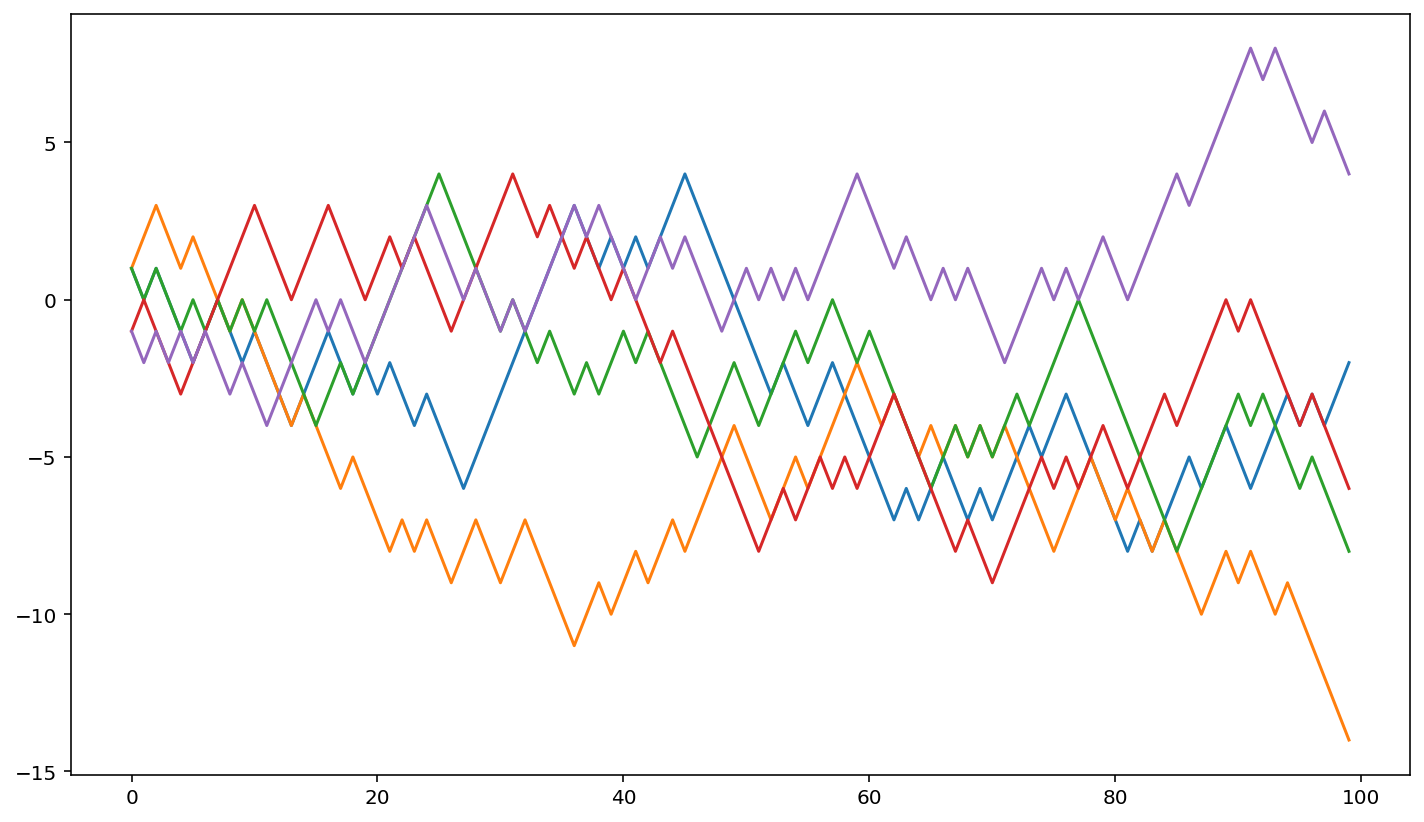

In [30]:
#Code301.py

import numpy as np
import random
#from utils import generate_SP,plotSP

fY=lambda : 1 if random.randint(0, 1) else -1
def generate_BerSum1():
    return generate_SP(fY)

# generate_BerSum2: equavalent version of generate_BerSum1 using umpy.cumsum
# (cummulative sum of the r.v values)
def generate_BerSum2():
    return np.cumsum([fY() for i in range(1000)])

plotSP(generate_BerSum2, 5)

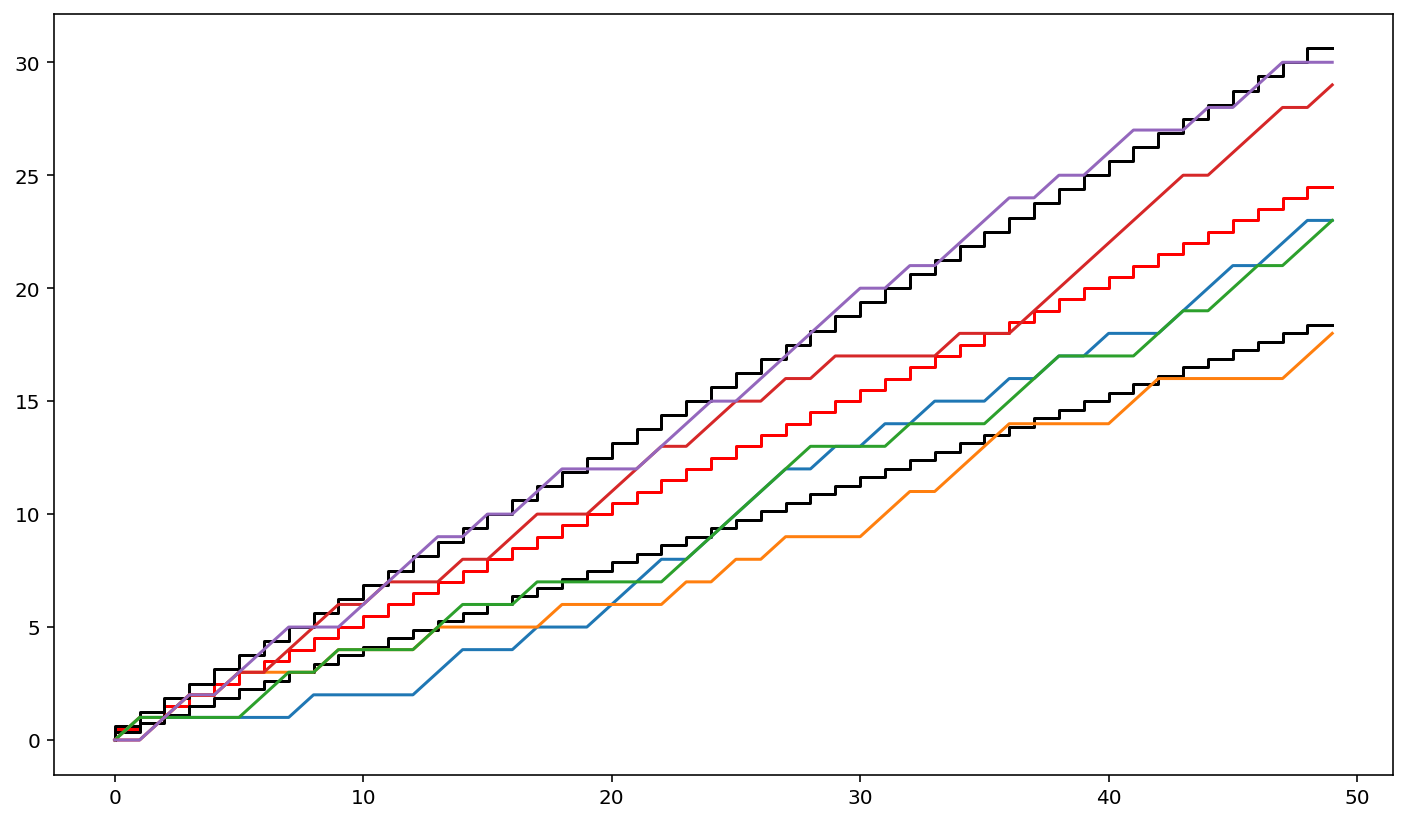

In [32]:
#Code302.py

import numpy as np
import random
import matplotlib.pyplot as plt

# plotter: plots SP realisations and E and V functions
def plotter(rgN, gen_SP, fE, fV):
    n = rgN
    plt.step(n, fE(n)          , color='red')
    plt.step(n, fE(n) + fV(n)/2, color='black')
    plt.step(n, fE(n) - fV(n)/2, color='black')
    plotSP(gen_SP, 5, N)

N, p = 50, 0.5;  rgN = np.arange(0,N)
fYBer = lambda : random.randint(0, 1)
fnEBer = lambda n: n*p
fnVBer = lambda n: n*p*(1-p)
def generate_SP_Ber(): return generate_SP(fYBer)

plotter(rgN, generate_SP_Ber, fnEBer, fnVBer)

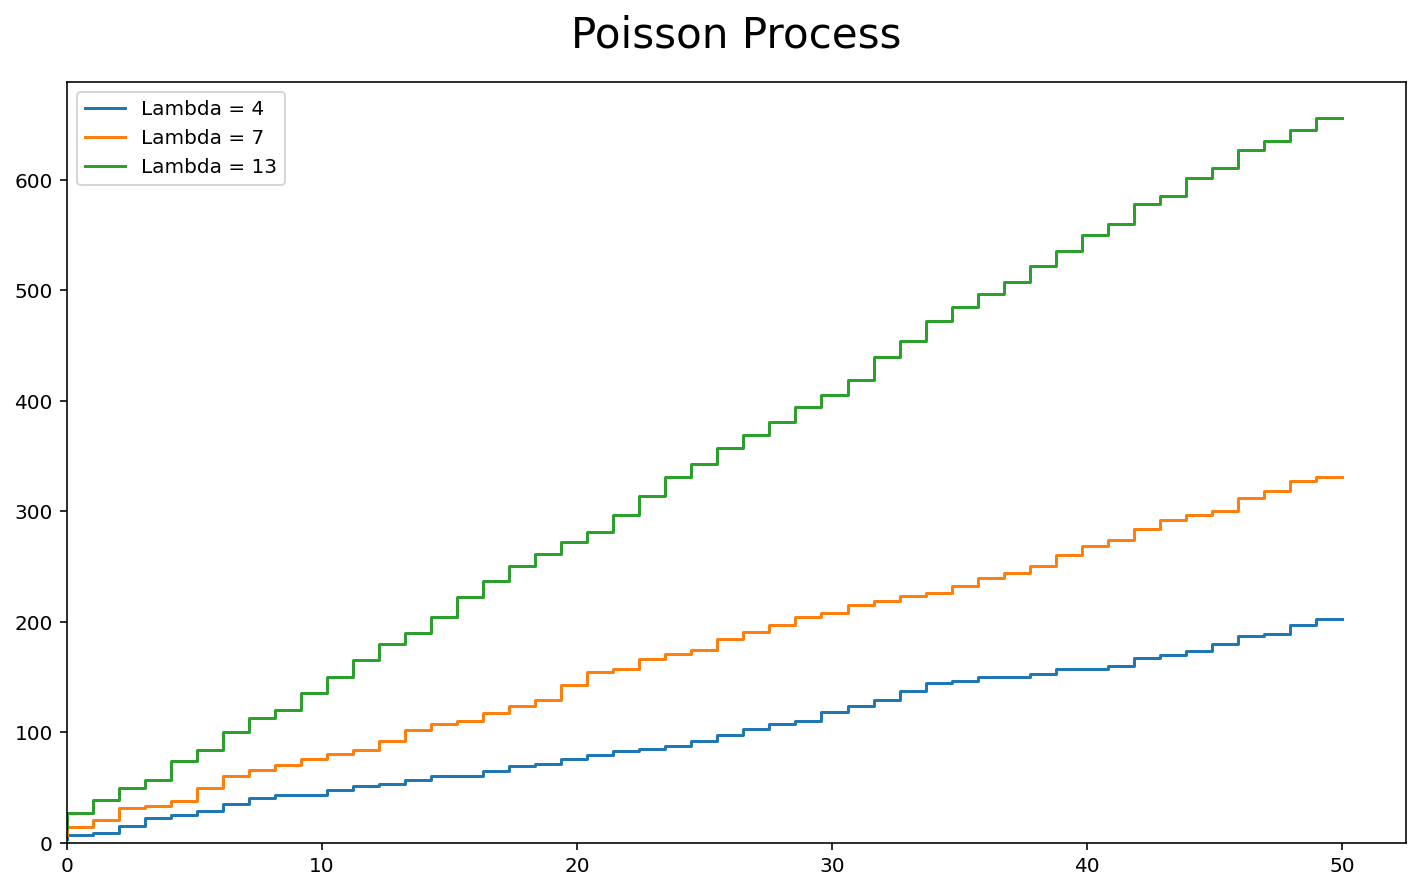

In [28]:
#Code303.py

import numpy as np
import matplotlib.pyplot as plt

# poisson_Proc: generates sampling for Poisson SP for different parameters
def poisson_Proc(N,lambdas):
    X_T = [np.random.poisson(lam, size=N) for lam in lambdas]
    return [np.cumsum(X) for X in X_T]

def plot_Poisson(N,S,lambdas):
    X = np.linspace(0, N, N)
    G = [plt.step(X, S[i], label="Lambda = %d"%lambdas[i])[0] for i in range(len(lambdas))]
    plt.legend(handles=G, loc=2)
    plt.title("Poisson Process", fontdict={'fontname': 'Times New Roman', 'fontsize': 21}, y=1.03)
    plt.ylim(0);  plt.xlim(0)
    plt.show()

N , lambdas = 50 , [4, 7, 13]
S = poisson_Proc(N,lambdas)
plot_Poisson(N,S,lambdas)

In [29]:
#Code304.py

import numpy as np
from numpy.random import exponential

# Example3.6
N, lamda, dixieme, dixOnze =10000, 3, [], []
for j in range(N):
    T_n = exponential(1/lamda)
    for i in range(12):
        S_n = exponential(1/lamda)
        T_n += S_n
        if(i==9): dixOnze.append(S_n)
        if(i==8): dixieme.append(T_n)

# question1
avg = np.array(dixieme).mean()
print("Average time until 10th arrival:",np.round(avg,3),"\n")

# question2
plusdunjour=[1 if i>1 else 0 for i in dixOnze]
proba = np.array(plusdunjour).sum()/len(plusdunjour)
print("Probability more than a day:",np.round(proba,3))

#______________________________   Output  ______________________________________
# Average time until 10th arrival: 3.325
# Probability more than a day: 0.053

Average time until 10th arrival: 3.326 

Probability more than a day: 0.048
